## Observations and Insights 

In [28]:
# ------------------------------------ KEY OBSERVATIONS -----------------------------------------
# 1.   A total of 10 drugs were tested on 249 mice with an almost equal split in gender (50.7% for male vs 49.3% for female)
# 2.   Among the four top drugs tested, only Infubinol was shown to contain outliers (one). 
#      Additionally Capamulin & Remicane consistently outperform the Infubinol & Ceftamin (based on the min, mean, max stats).
# 3.   Average tumor volume shows strong positive correlation with mice weight, with correlation coefficient ~ 0.93

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Reviewing the data from first input file
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Reviewing the data from first input file
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID

# Identifying the row that contains duplicate data
study_results.loc[study_results.duplicated()==True]
# removing the duplicate row
study_results_clean=study_results.drop_duplicates(['Mouse ID', 'Timepoint'])
print(f"Original study_results number of samples - {len(study_results)}, cleaned up number of samples - {len(study_results_clean)}")

Original study_results number of samples - 1893, cleaned up number of samples - 1888


In [5]:
# Combine the data into a single dataset
all_data_inner=pd.merge(mouse_metadata,study_results_clean,on='Mouse ID', how='inner')
all_data_inner.head()

all_data_outer=pd.merge(mouse_metadata,study_results_clean,on='Mouse ID', how='outer')
all_data_outer.head()

# Compare inner vs outser merge results
# print(f"Merged data row count:\nInner\t\t{len(all_data_inner)}\nOuter\t\t{len(all_data_outer)}")

# Since it seems that type of merging has no effect, we can assume that each table contains exactly 
# the same number of values and values themselves of the Mouse ID
all_data=pd.merge(mouse_metadata,study_results_clean,on='Mouse ID')

# Display the data table for preview
all_data.head()
all_data.shape

(1888, 8)

In [6]:
# Checking the number of mice.
nmb_mice=all_data['Mouse ID'].nunique()
print(f"Number of mice\t\t{nmb_mice}")

Number of mice		249


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id_duplicate=study_results.loc[study_results.duplicated()==True]['Mouse ID'].unique()[0]
print(f"Mouse ID which had duplicate data:\t{mouse_id_duplicate}")

Mouse ID which had duplicate data:	g989


In [8]:
# Optional: Get all the data for the duplicate mouse ID.
g989_data=all_data[all_data['Mouse ID']== mouse_id_duplicate]
                   
# Group all data by Drug Regimen
all_data_by_drug=all_data.groupby(['Drug Regimen'])

# pull out statistics on Tumor Volume (mm3)
all_data_by_drug['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
all_data_wo_g989=all_data[all_data['Mouse ID']!= mouse_id_duplicate]
all_data_wo_g989.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
nmb_mice_wo_g989=all_data_wo_g989['Mouse ID'].nunique()
print(f"Number of mice\t\t{nmb_mice_wo_g989}")

Number of mice		248


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Group all data by Drug Regimen
all_data_by_drug=all_data.groupby(['Drug Regimen'])

# Set up data dictionary to later convert to summary data frame
tumor_vol_by_drug_dic={
    # pull out statistics on Tumor Volume (mm3)
    "Mean" : all_data_by_drug['Tumor Volume (mm3)'].mean(),
    "Median" : all_data_by_drug['Tumor Volume (mm3)'].median(),
    "Variance" : all_data_by_drug['Tumor Volume (mm3)'].var(),
    "Standard deviation" : all_data_by_drug['Tumor Volume (mm3)'].std(),
    "Standard error of the mean" : all_data_by_drug['Tumor Volume (mm3)'].sem()
}
tumor_vol_by_drug=pd.DataFrame(tumor_vol_by_drug_dic)
tumor_vol_by_drug

,Mean,Median,Variance,Standard deviation,Standard error of the mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
all_data_by_drug['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total number of Unique Mice Tested'}, xlabel='Drug regiment'>

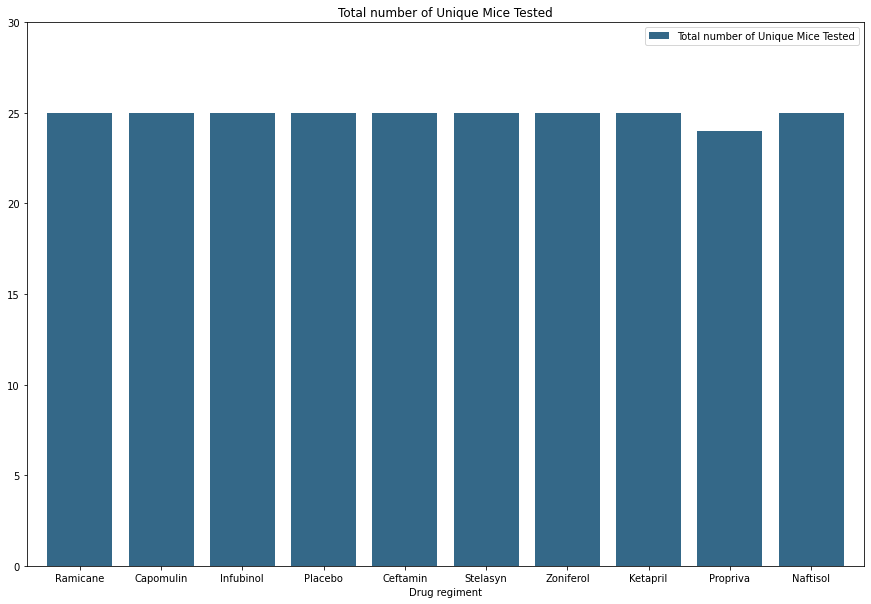

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# redefine grouping
all_data_by_drug=all_data.groupby(['Drug Regimen'])

# List of unique drug names
list_of_drugs=all_data['Drug Regimen'].unique()

# Creating a pandas dataframe
df = pd.DataFrame({'Drug regiment': list_of_drugs, 
                   'Total number of Unique Mice Tested': all_data_by_drug['Mouse ID'].nunique()})
  
# Creating a bar graph of size 15 inches wide and 10 inches high
df.plot(kind='bar',
        x='Drug regiment', 
        y='Total number of Unique Mice Tested', 
        rot=0, 
        color='#346888',
        figsize=(15, 10), 
        ylim=(0,30),
        width=0.8,
       align='center',
       title='Total number of Unique Mice Tested')


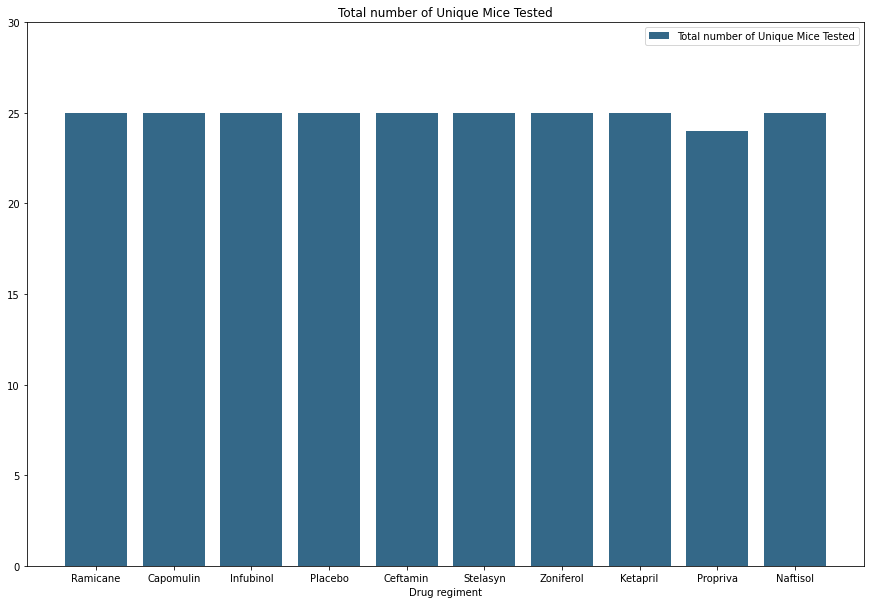

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.figure(figsize=(15,10))
plt.bar(list_of_drugs,
        all_data_by_drug['Mouse ID'].nunique(), 
        color='#346888', 
        width=0.8,
        label="Total number of Unique Mice Tested",
        align='center'
       )
plt.ylim([0,30])
# plt.xlabel()
plt.xlabel("Drug regiment")
plt.title("Total number of Unique Mice Tested")
plt.legend()
plt.tight_layout

# save figure for reporting
plt.savefig('figures/total_mice_count_per_drug.png')

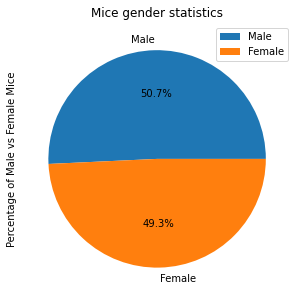

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Creating a pandas dataframe
df = pd.DataFrame({'Percentage of Male vs Female Mice': all_data['Sex'].value_counts()}, 
                  index=all_data['Sex'].unique())
# Creating the pie plot
df.plot(kind='pie',
        y='Percentage of Male vs Female Mice', 
        figsize=(5, 5),
       autopct='%1.1f%%')
plt.title("Mice gender statistics")

# save figure for reporting
plt.savefig('figures/mice_gender_pie.png')

Text(0.5, 1.0, 'Mice gender statistics')

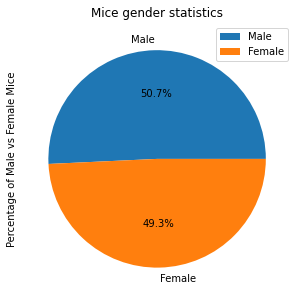

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5,5))
plt.pie(all_data['Sex'].value_counts(), 
        labels=all_data['Sex'].unique(), autopct="%1.1f%%")
plt.legend()
plt.ylabel('Percentage of Male vs Female Mice')
plt.title("Mice gender statistics")

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Creating a list of selected drugs
best_4_drugs=["Capomulin", "Ramicane","Infubinol", "Ceftamin"]

# Preserve only teh columns needed for analysis
select_columns_data=all_data[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]

# Filetring the dataset to only the selected drug records
best_4_drugs_data=select_columns_data[select_columns_data['Drug Regimen'].isin(best_4_drugs)]
# print(best_4_drugs_data)
# best_4_drugs_data['Drug Regimen'].unique()

# Start by getting the last (greatest) timepoint for each mouse
# first group df by 'Mouse ID' to analyze specific rows per each mouse
best_4_drugs_data_grp_by_mouse_id=best_4_drugs_data.groupby(['Mouse ID'])
# Figure out last (latest) time measurement for each mouse ID
best_4_drugs_last_timepoint_data=best_4_drugs_data_grp_by_mouse_id['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data=pd.merge(best_4_drugs_last_timepoint_data, select_columns_data, on=['Mouse ID','Timepoint'], how='inner')
merged_data

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543
...,...,...,...,...
95,y769,45,Ceftamin,68.594745
96,y793,45,Capomulin,31.896238
97,y865,45,Ceftamin,64.729837
98,z578,45,Ramicane,30.638696


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
best_4_drugs=["Capomulin", "Ramicane","Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_4_plotting=[]
q14stat=[]
q34stat=[]
iqr4stat=[]
low4stat=[]
upper4stat=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in best_4_drugs:

#   Filter out data for a specific drug 
    data_per_drug=merged_data[merged_data['Drug Regimen']==drug]
    tumor_vol=data_per_drug['Tumor Volume (mm3)']
    
#   Calculate Q1, Q2 and Q3 stats  
    q=tumor_vol.quantile([0.25,0.50,0.75])
#   print(q)

#   Calculate IQR  
    iqr=round(q[0.75]-q[0.25],2)
#   print(f"iqr is {iqr}")

    lower=round(q[0.25]-1.5*iqr,2)
    upper=round(q[0.75]+1.5*iqr,2)
    
    tumor_vol_data_4_plotting.append(tumor_vol)
    q14stat.append(round(q[0.25],2))
    q34stat.append(round(q[0.75],2))
    iqr4stat.append(iqr)
    low4stat.append(lower)
    upper4stat.append(upper)

outlier_stat_dic={
    "Drug regimen": best_4_drugs,
    "Q1":  q14stat,
    "Q3":  q34stat,
    "IQR": iqr4stat,
    "Lower": low4stat,
    "Upper": upper4stat,
    
}    

outlier_stat=pd.DataFrame(outlier_stat_dic)
outlier_stat

,Drug regimen,Q1,Q3,IQR,Lower,Upper
0,Capomulin,32.38,40.16,7.78,20.71,51.83
1,Ramicane,31.56,40.66,9.10,17.91,54.31
2,Infubinol,54.05,65.53,11.48,36.83,82.75
3,Ceftamin,48.72,64.30,15.58,25.35,87.67


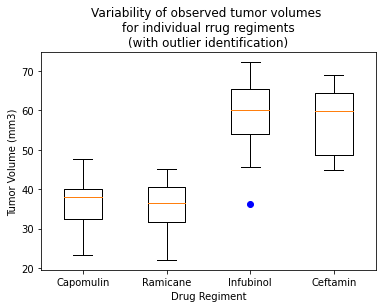

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data_4_plotting, flierprops=dict(markerfacecolor='b', markeredgecolor="b"))
# Add tick names
plt.xticks([1,2,3,4],best_4_drugs)
# add axis names
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regiment')
plt.title('Variability of observed tumor volumes \nfor individual rrug regiments\n(with outlier identification)')

# save figure for reporting
plt.savefig('figures/drug_vs_vol_boxplot.png')

## Line and Scatter Plots

['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


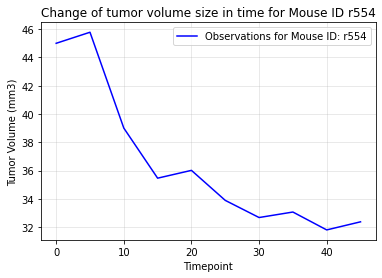

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
list_of_mice_on_Capomulin=all_data[all_data['Drug Regimen']=="Capomulin"]['Mouse ID'].unique()
print(list_of_mice_on_Capomulin)

# randomly select Mouse Id
import random
mouse_ID_4_plotting=random.choice(list_of_mice_on_Capomulin)
# for the sake of reporting to README.md will choose Mouse ID r554
mouse_ID_4_plotting="r554"
x=all_data[all_data['Mouse ID']==mouse_ID_4_plotting]['Timepoint']
y=all_data[all_data['Mouse ID']==mouse_ID_4_plotting]['Tumor Volume (mm3)']
plt.plot(x,y, c="b", label=f"Observations for Mouse ID: {mouse_ID_4_plotting}")
# adding axis labels & title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Change of tumor volume size in time for Mouse ID {mouse_ID_4_plotting}")
# adding grid with transparency
plt.grid(alpha=0.35)
# adding legend
plt.legend()

# save figure for reporting
plt.savefig(f'figures/timepoint_vs_vol_for_mouse_id_{mouse_ID_4_plotting}.png')

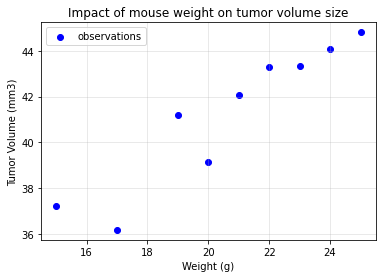

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# x axis represents mice weights of only the mice who were treated with Capomulin 
x=all_data[all_data['Drug Regimen']=="Capomulin"]['Weight (g)'].unique()

# to get y coordinates we first filter the data by dryg name, then group by mouse weight and then 
# take mean of Tumor Volume measurements for each weight group 
y=all_data[all_data['Drug Regimen']=="Capomulin"].groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

# setting up the scater plot 
plt.scatter(x,y, c="b", label='observations')
# adding axis labels & title
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Impact of mouse weight on tumor volume size")
# adding grid with transparency
plt.grid(alpha=0.35)
# adding legend
plt.legend()

# save figure for reporting
plt.savefig('figures/weight_vs_vol_scatter.png')

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import pearsonr, linregress
cor_coeff= pearsonr(x,y)
cor_coeff

slope, intercept, rvalue, pvalue, stderr=linregress(x,y)
y_pred=slope*x+intercept

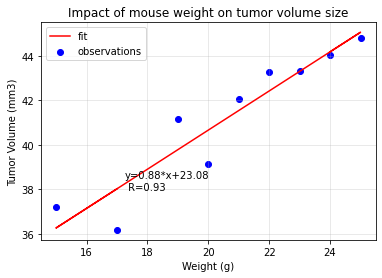

In [23]:
# regenerating the underlying scater plot 
plt.scatter(x,y, c="b", label='observations')
# adding axis labels
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.plot(x,y_pred,c='r', label='fit')
plt.title("Impact of mouse weight on tumor volume size")
# adding grid with transparency
plt.grid(alpha=0.35)
plt.legend()
# Place text dinamically based on the x axis range
plt.text(min(x)*1.15,min(y)*1.05,f"y={round(slope,2)}*x+{round(intercept,2)}\n R={round(cor_coeff[0],2)}")

# save figure for reporting
plt.savefig('figures/weight_vs_vol_scatter_w_fit.png')